In [76]:
import requests
import numpy as np
import os
import glob
import urllib.request
import pandas as pd
import csv
import io
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [77]:
diabetes_df=pd.read_csv('diabetes.csv')

In [78]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
diabetes_df.size

6912

In [80]:
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
diabetes_df.astype

<bound method NDFrame.astype of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [82]:
diabetes_df.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


In [83]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [84]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [85]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
diabetes_df['Outcome'].sum()

268

In [88]:
Glucose=diabetes_df.filter(items=['Glucose'])
print(Glucose)


     Glucose
0        148
1         85
2        183
3         89
4        137
..       ...
763      101
764      122
765      121
766      126
767       93

[768 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

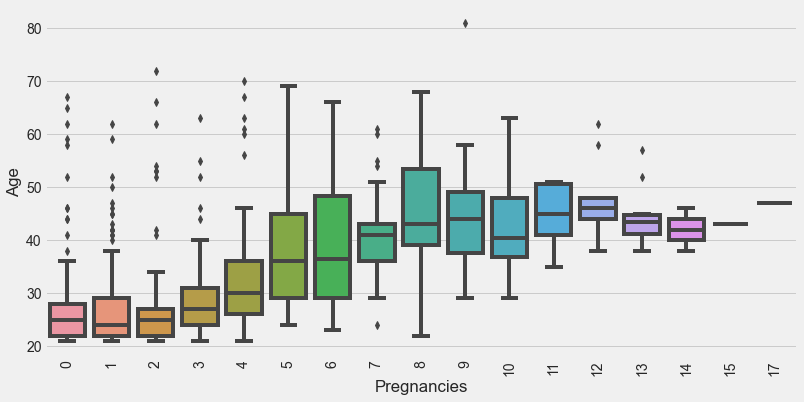

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(data=diabetes_df, x='Pregnancies', y='Age')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Age'>

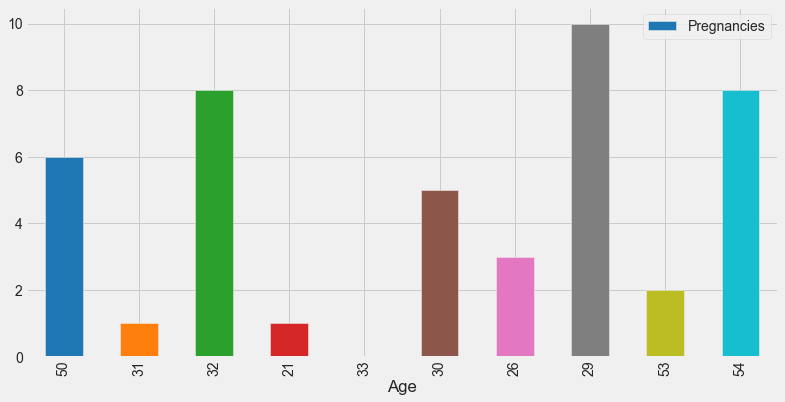

In [90]:
diabetes_df.head(10).plot.bar(x='Age', y='Pregnancies',figsize=(12,6), color=sns.color_palette("tab10"))


<AxesSubplot:xlabel='Age'>

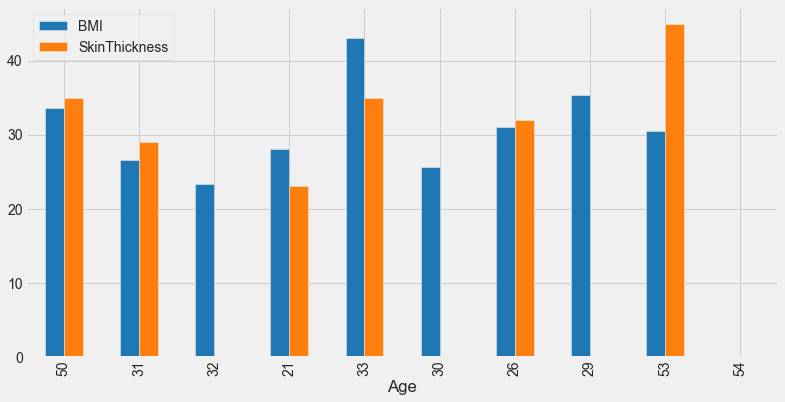

In [94]:
diabetes_df.head(10).plot.bar(x='Age', y=['BMI','SkinThickness'], figsize=(12,6), color=sns.color_palette("tab10"))

In [95]:
diabetes_df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


<AxesSubplot:xlabel='Age'>

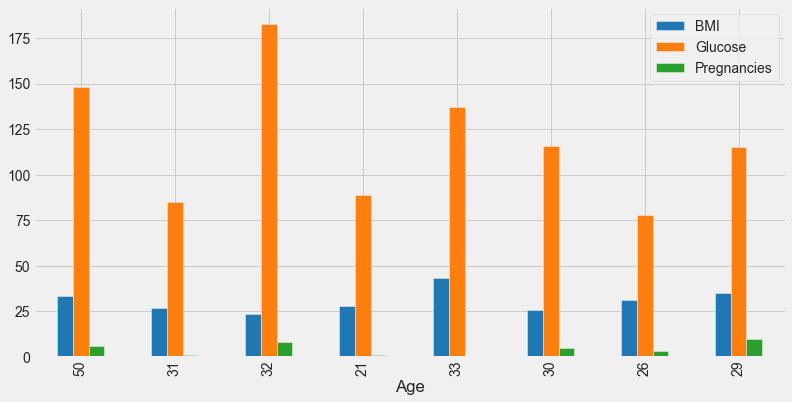

In [96]:
diabetes_df.head(8).plot.bar(x='Age', y=['BMI','Glucose', 'Pregnancies'], figsize=(12,6), color=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Age'>

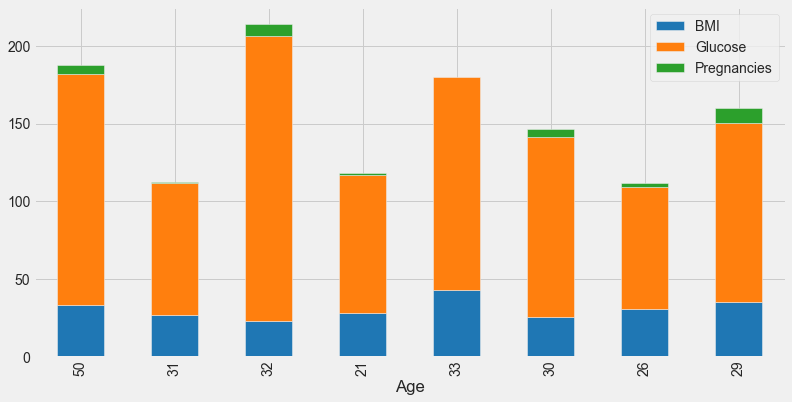

In [97]:
diabetes_df.head(8).plot.bar(x='Age', y=['BMI','Glucose', 'Pregnancies'], figsize=(12,6), stacked=True, color=sns.color_palette("tab10"))

<AxesSubplot:xlabel='SkinThickness'>

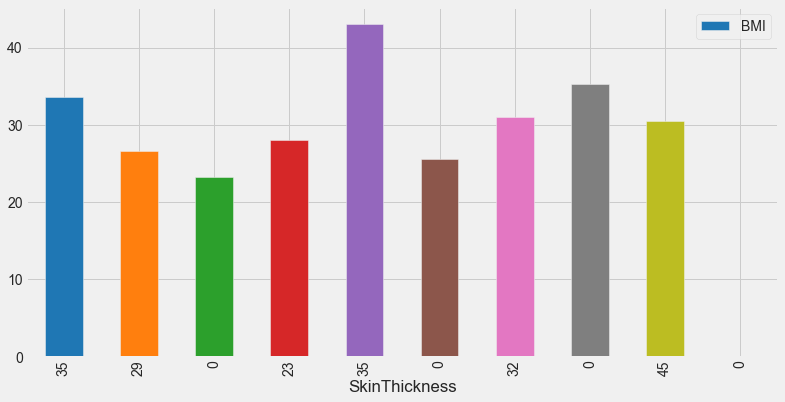

In [100]:
diabetes_df.head(10).plot.bar(x='SkinThickness', y='BMI',figsize=(12,6), color=sns.color_palette("tab10"))


<AxesSubplot:xlabel='Outcome'>

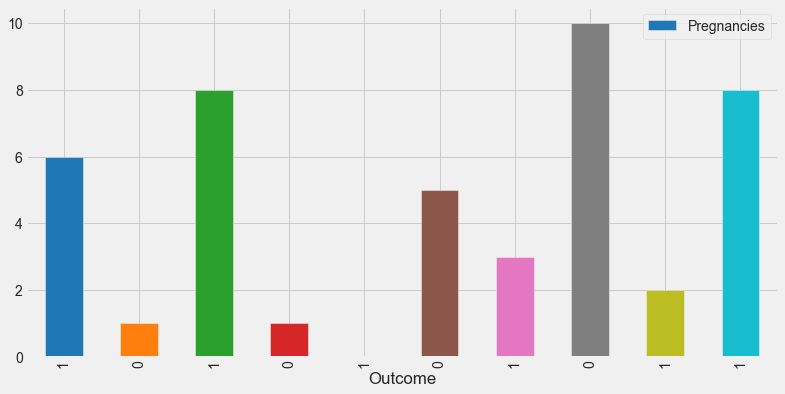

In [103]:
diabetes_df.head(10).plot.bar(x='Outcome', y='Pregnancies',figsize=(12,6), color=sns.color_palette("tab10"))


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

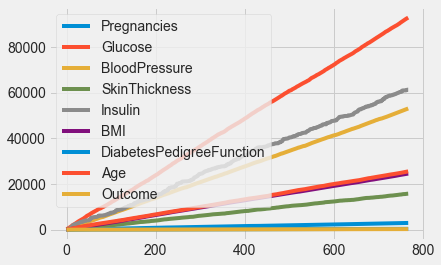

In [92]:
df = diabetes_df.cumsum()

plt.figure()

df.plot()

In [63]:
df = pd.DataFrame(np.random.randn(1000, 4),  columns=list("ABCD"))

df

,A,B,C,D
0,-2.236600,0.919923,-0.848448,1.340897
1,1.513169,-0.507519,-0.655532,1.699652
2,-0.698186,0.087239,-2.505822,0.309132
3,0.714255,-1.920153,-0.076861,-0.167252
4,2.596263,0.220155,0.283931,-0.669348
...,...,...,...,...
995,-1.117438,0.835343,0.448940,-0.227549
996,0.875936,-1.012937,-0.797811,0.434402
997,0.941296,1.430800,-1.367113,0.144533
998,-0.178532,-0.306130,-0.419071,-0.004936
